In [179]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [180]:
df = pd.read_csv("https://raw.githubusercontent.com/LukasRonberg/BIExam/refs/heads/main/data/master.csv")

In [181]:
df.shape

(27820, 12)

In [182]:
list(df)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [183]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
10655,Grenada,2012,male,5-14 years,0,9447,0.00,Grenada2012,0.740,"799,882,148",8382,Generation Z
21878,Saint Vincent and Grenadines,2011,female,5-14 years,0,9530,0.00,Saint Vincent and Grenadines2011,0.713,"676,129,407",6759,Generation Z
26897,United States,1989,male,55-74 years,5185,18295000,28.34,United States1989,NaN,"5,657,693,000,000",24654,G.I. Generation
7127,Czech Republic,1992,female,35-54 years,164,1465300,11.19,Czech Republic1992,NaN,"34,590,052,812",3573,Boomers
24318,Suriname,2010,female,5-14 years,4,48769,8.20,Suriname2010,0.707,"4,368,398,048",9176,Generation Z


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [185]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [186]:
# dropper hdi pga mange null values
df = df.drop('HDI for year', axis=1)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [188]:
df.duplicated().sum()

0

In [189]:
print(list(df.columns))


['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [190]:
# laver ny column så gdp for year bliver til numeric i stedet for et objekt

df['gdp_for_year'] = (
    df[' gdp_for_year ($) ']
      .str.replace(r'[^\d]', '', regex=True)
      .astype(float)
)


In [191]:
df = df.drop(columns=['country-year', ' gdp_for_year ($) ', 'generation'])


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_per_capita ($)  27820 non-null  int64  
 8   gdp_for_year        27820 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.9+ MB


In [193]:
age_order = ['5-14 years','15-24 years','25-34 years',
             '35-54 years','55-74 years','75+ years']

df['age'] = pd.Categorical(
    df['age'],
    categories=age_order,
    ordered=True
)

df['age_encoded'] = df['age'].cat.codes

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
dtypes: category(1), float64(2), int64(4), int8(1), object(2)
memory usage: 1.8+ MB


In [195]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gdp_for_year,age_encoded
0,Albania,1987,male,15-24 years,21,312900,6.71,796,2.156625e+09,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,2.156625e+09,3
2,Albania,1987,female,15-24 years,14,289700,4.83,796,2.156625e+09,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,2.156625e+09,5
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2.156625e+09,2


In [196]:
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

In [197]:
# 2. Build a mapping dict (alphabetical order here, but you can choose any)
countries = sorted(df['country'].unique())
country_map = {c: i+1 for i, c in enumerate(countries)}

# 3. Apply it
df['country_numeric'] = df['country'].map(country_map)

# 4. (Optional) inspect your mapping
print(country_map)

{'Albania': 1, 'Antigua and Barbuda': 2, 'Argentina': 3, 'Armenia': 4, 'Aruba': 5, 'Australia': 6, 'Austria': 7, 'Azerbaijan': 8, 'Bahamas': 9, 'Bahrain': 10, 'Barbados': 11, 'Belarus': 12, 'Belgium': 13, 'Belize': 14, 'Bosnia and Herzegovina': 15, 'Brazil': 16, 'Bulgaria': 17, 'Cabo Verde': 18, 'Canada': 19, 'Chile': 20, 'Colombia': 21, 'Costa Rica': 22, 'Croatia': 23, 'Cuba': 24, 'Cyprus': 25, 'Czech Republic': 26, 'Denmark': 27, 'Dominica': 28, 'Ecuador': 29, 'El Salvador': 30, 'Estonia': 31, 'Fiji': 32, 'Finland': 33, 'France': 34, 'Georgia': 35, 'Germany': 36, 'Greece': 37, 'Grenada': 38, 'Guatemala': 39, 'Guyana': 40, 'Hungary': 41, 'Iceland': 42, 'Ireland': 43, 'Israel': 44, 'Italy': 45, 'Jamaica': 46, 'Japan': 47, 'Kazakhstan': 48, 'Kiribati': 49, 'Kuwait': 50, 'Kyrgyzstan': 51, 'Latvia': 52, 'Lithuania': 53, 'Luxembourg': 54, 'Macau': 55, 'Maldives': 56, 'Malta': 57, 'Mauritius': 58, 'Mexico': 59, 'Mongolia': 60, 'Montenegro': 61, 'Netherlands': 62, 'New Zealand': 63, 'Nicarag

In [198]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gdp_for_year,age_encoded,sex_numeric,country_numeric
0,Albania,1987,male,15-24 years,21,312900,6.71,796,2.156625e+09,1,1,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,2.156625e+09,3,1,1
2,Albania,1987,female,15-24 years,14,289700,4.83,796,2.156625e+09,1,2,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,2.156625e+09,5,1,1
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2.156625e+09,2,1,1


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
 10  sex_numeric         27820 non-null  int64   
 11  country_numeric     27820 non-null  int64   
dtypes: category(1), float64(2), int64(6), int8(1), object(2)
memory usage: 2.2+ MB


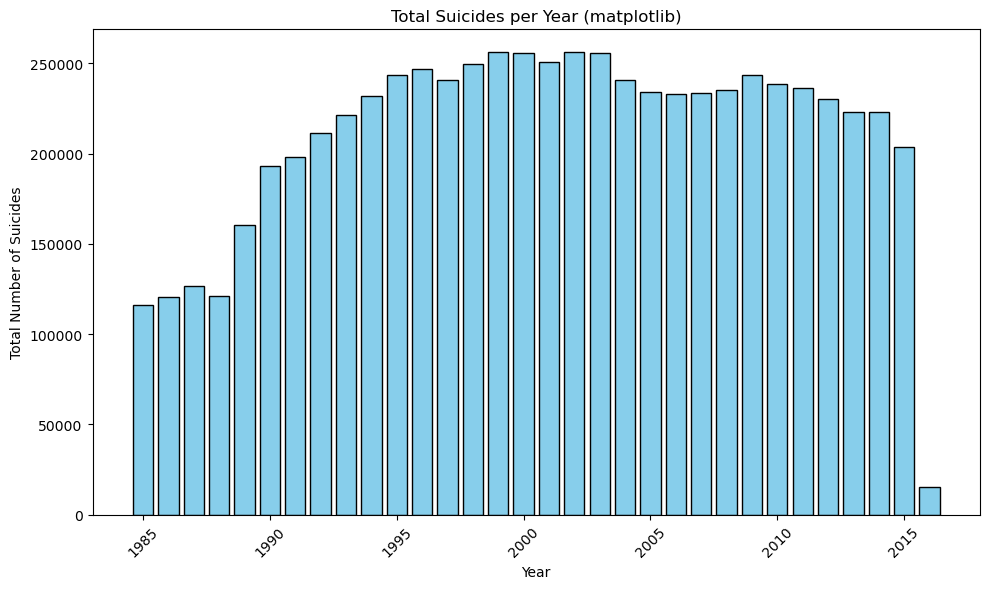

In [200]:
# 2. Aggregate total suicides per year
yearly = df.groupby('year', as_index=False)['suicides_no'].sum()

# 3a. Plot with matplotlib
plt.figure(figsize=(10,6))
plt.bar(yearly['year'], yearly['suicides_no'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total Number of Suicides')
plt.title('Total Suicides per Year (matplotlib)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [201]:
# Fjern alle rows i 2016, da dataen fra det år er minimalt
df = df[df['year'] != 2016]

# Tjek at den er væk
print(df['year'].unique())

[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011]


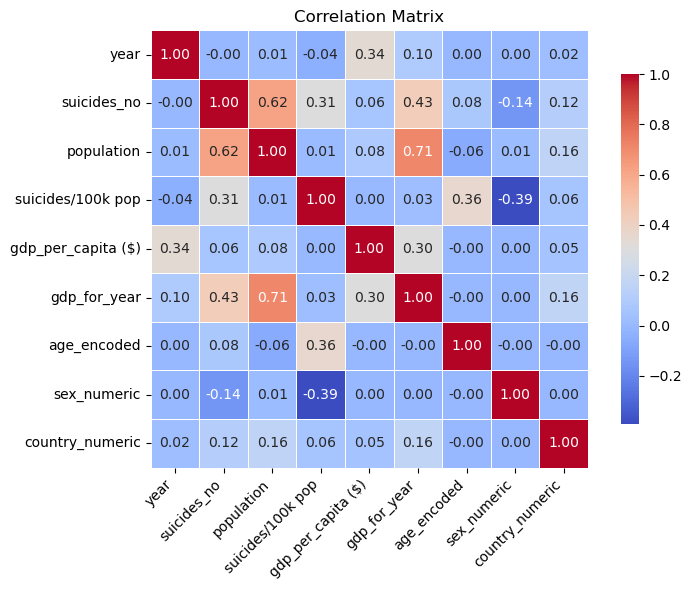

In [202]:
# 6. Compute correlation matrix on all numeric columns
corr = df.corr(numeric_only=True)

# 7. Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 🔍 Analyse af Korrelationsmatrix

Vi har valgt **`suicides/100k pop`** som vores afhængige variabel, da den bedst udtrykker antallet af selvmord normaliseret pr. 100.000 indbyggere og dermed er sammenlignelig på tværs af lande og befolkninger.

Ud fra korrelationsmatricen ser vi følgende:

| Uafhængig variabel    | Korrelation med `suicides/100k pop` | Tolkning |
|-----------------------|--------------------------------------|----------|
| `age_encoded`         | **+0.36**                            | Der er en moderat positiv sammenhæng – alder har betydning. |
| `sex_numeric`         | **-0.39**                            | Der ses en tydelig forskel mellem køn – selvmordsraten er højere for mænd. |
| `gdp_per_capita ($)`  | +0.03                                | Ingen nævneværdig lineær sammenhæng. |
| `gdp_for_year`        | +0.03                                | Svag korrelation – økonomisk niveau alene forklarer ikke forskelle. |
| `population`          | +0.01                                | Ubetydelig. |
| `year`                | -0.04                                | Ingen reel sammenhæng. |
| `country_numeric`     | +0.06                                | Ikke signifikant. |

---

### Konklusion

- Vi konkluderer, at **alder (`age_encoded`) og køn (`sex_numeric`)** er de mest forklarende faktorer i forhold til selvmordsraten pr. 100.000 personer.
- Økonomiske variable og tid har ingen eller meget svag lineær sammenhæng med selvmordsraterne.
- Vores videre analyser bør fokusere på **demografiske faktorer** (alder og køn) og deres samspil.

---

### Næste skridt

- Vi vil visualisere data med fx boxplots eller interaktive grafer.
- Vi vil bygge en simpel **lineær regressionsmodel** med alder og køn som forklarende variable.



   age_encoded  suicides/100k pop          age
0            0            2858.39   5-14 years
1            1           41292.61  15-24 years
2            2           56239.60  25-34 years
3            3           68960.47  35-54 years
4            4           74513.18  55-74 years
5            5          110532.19    75+ years


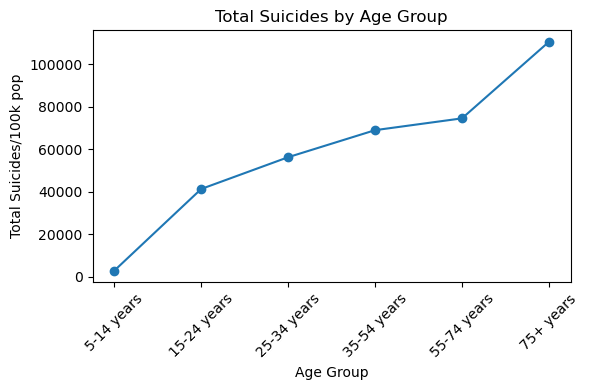

In [203]:
# Age encoded gav ikke et helt forventet resultat, så vi laver et nyt plot for at se den rigtige korrelation
age_totals = df.groupby('age_encoded', as_index=False)['suicides/100k pop'].sum()

# Map back to labels for plotting
age_totals['age'] = age_totals['age_encoded'].map(
    dict(enumerate(age_order))
)

print(age_totals)

# Plot the relationship
plt.figure(figsize=(6,4))
plt.plot(age_totals['age_encoded'], age_totals['suicides/100k pop'], marker='o')
plt.xticks(age_totals['age_encoded'], age_totals['age'], rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Total Suicides/100k pop')
plt.title('Total Suicides by Age Group')
plt.tight_layout()
plt.show()

   sex_numeric  suicides/100k pop     sex
0            1          279767.16    male
1            2           74629.28  female


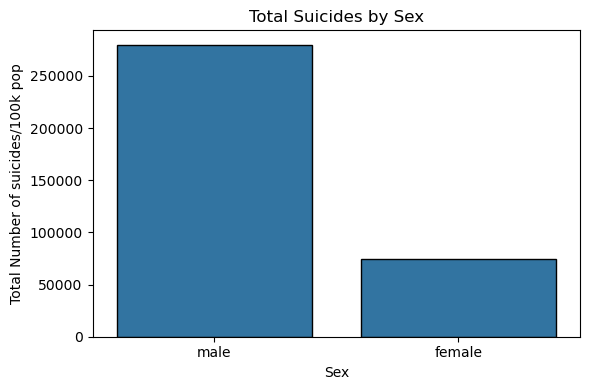

In [204]:
# 1. Sørg for at sex_numeric findes
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

# 2. Aggrér total suicider per køn
sex_totals = df.groupby('sex_numeric', as_index=False)['suicides/100k pop'].sum()

# 3. Map tal tilbage til labels
sex_map = {1: 'male', 2: 'female'}
sex_totals['sex'] = sex_totals['sex_numeric'].map(sex_map)

print(sex_totals)


plt.figure(figsize=(6,4))
sns.barplot(data=sex_totals, x='sex', y='suicides/100k pop', edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Total Number of suicides/100k pop')
plt.title('Total Suicides by Sex')
plt.tight_layout()
plt.show()


C:\Users\larsg\AppData\Local\Temp\ipykernel_13292\2608092169.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_age = df.groupby(['age', 'sex'], as_index=False)['suicides/100k pop'].sum()


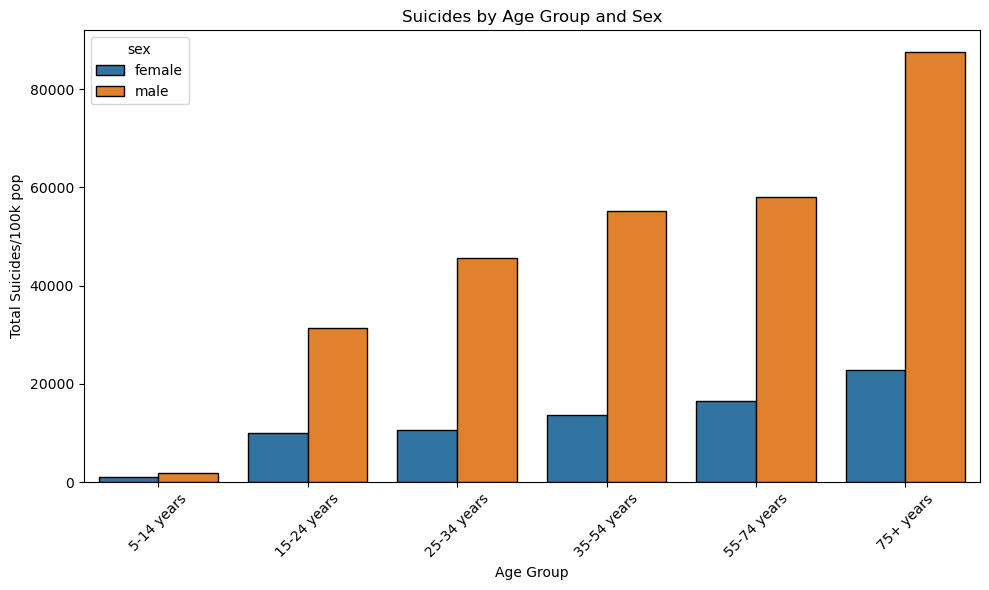

In [207]:
# Gruppér efter både alder og køn
sex_age = df.groupby(['age', 'sex'], as_index=False)['suicides/100k pop'].sum()

# Barplot med hue
plt.figure(figsize=(10,6))
sns.barplot(data=sex_age, x='age', y='suicides/100k pop', hue='sex', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides/100k pop')
plt.title('Suicides by Age Group and Sex')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Suicidrater fordelt på alder og køn

Vi har nu undersøgt, hvordan selvmordsraterne (målt som `suicides/100k pop`) fordeler sig både på køn og aldersgrupper. Ved at gruppere data efter `age` og `sex` og visualisere dem i et grupperet søjlediagram, kan vi konkludere følgende:

- **Mænd har generelt en markant højere suicidrate end kvinder** i samtlige aldersgrupper.
- Den største forskel ses i aldersgruppen **75+ år**, hvor mænds suicidrate er næsten fire gange så høj som kvinders.
- Den laveste selvmordsrate ses i aldersgruppen **5-14 år**, uanset køn, hvilket er forventeligt.
- Kvinders selvmordsrate er relativt stabil på tværs af aldersgrupper, mens mænds rate stiger markant med alderen og topper i **75+ år**.

Disse resultater understreger behovet for målrettede forebyggende tiltag – især blandt ældre mænd. Det vil være oplagt at analysere yderligere faktorer såsom økonomiske forhold og geografisk placering for at opnå en mere nuanceret forståelse af mønstrene.



C:\Users\larsg\AppData\Local\Temp\ipykernel_13292\744704795.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_totals_sorted, y='country', x='suicides/100k pop', palette='viridis')


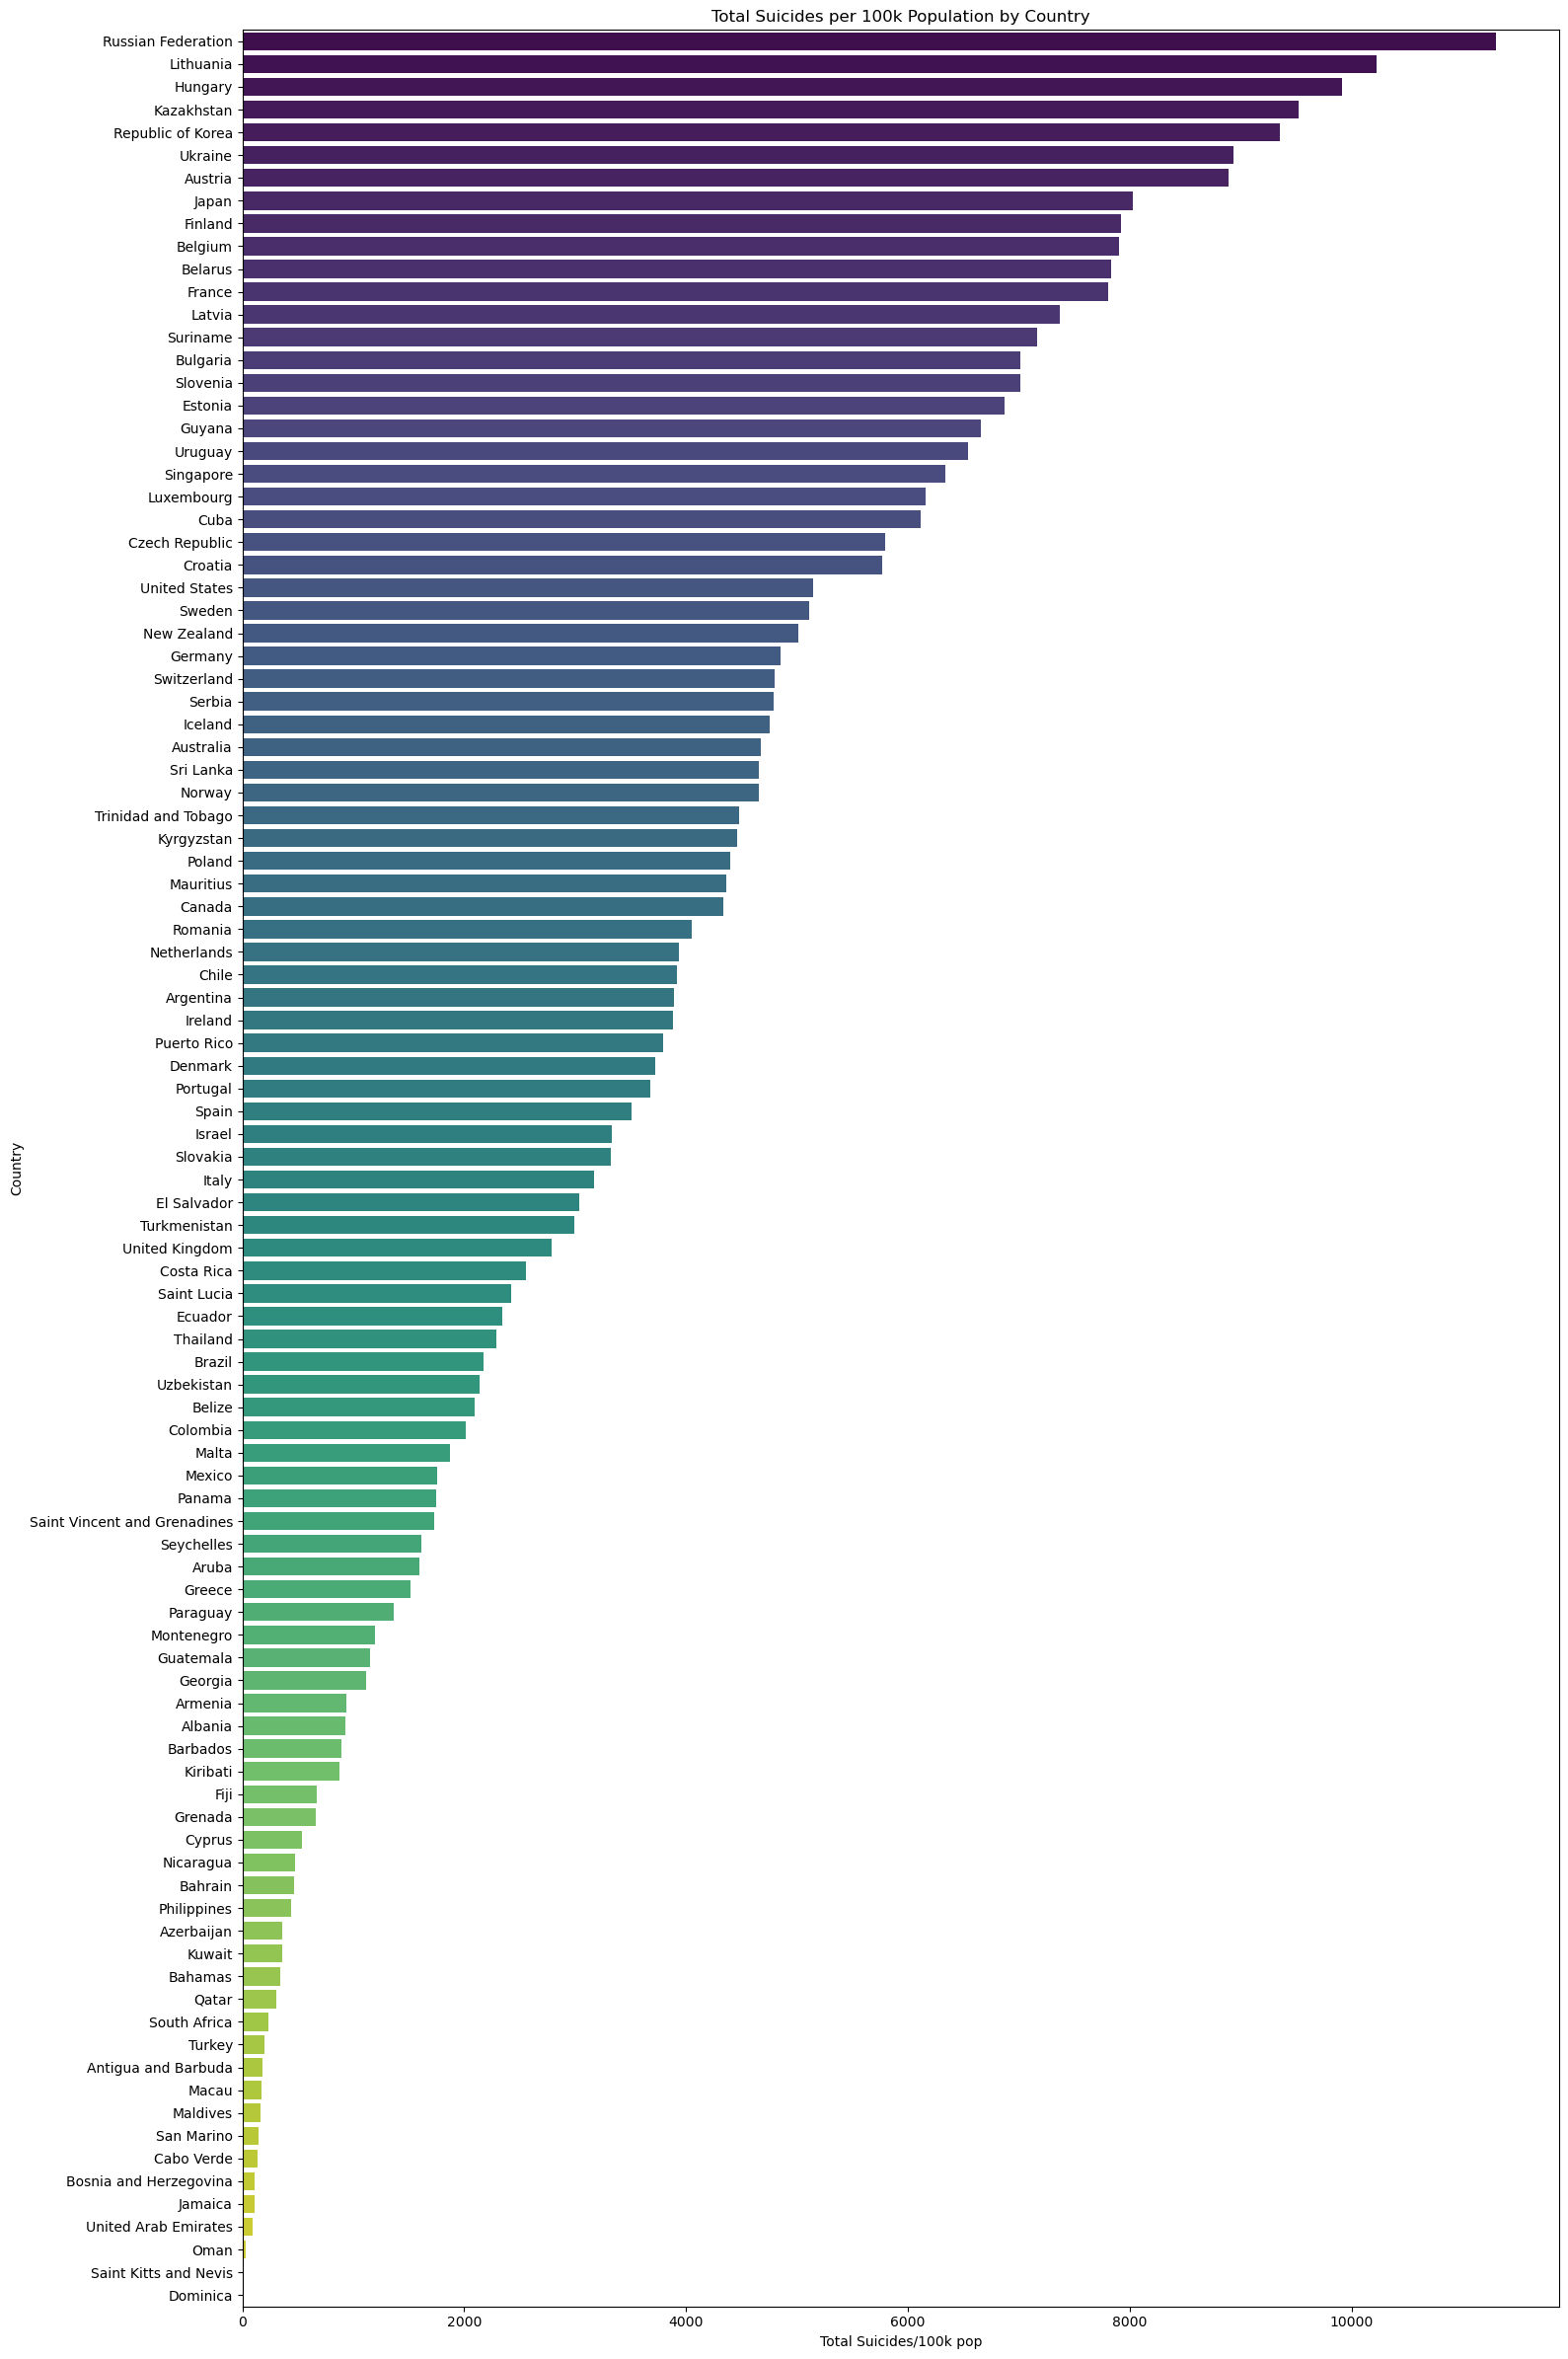

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Gruppér og aggrégér selvmord pr. 100k indbyggere per land
country_totals = df.groupby('country', as_index=False)['suicides/100k pop'].sum()

# Sortér efter selvmordsrate og bevar alle lande
country_totals_sorted = country_totals.sort_values(by='suicides/100k pop', ascending=False)

# Plot
plt.figure(figsize=(16, 24))
sns.barplot(data=country_totals_sorted, y='country', x='suicides/100k pop', palette='viridis')
plt.xlabel('Total Suicides/100k pop')
plt.ylabel('Country')
plt.title('Total Suicides per 100k Population by Country')
plt.tight_layout()
plt.show()


### Selvmordsrater fordelt på lande

Ved at sammenfatte den gennemsnitlige selvmordsrate (`suicides/100k pop`) pr. land og visualisere den, kan vi drage flere vigtige konklusioner:

- Der er **store forskelle mellem lande** i forhold til selvmordsrater, både i absolutte tal og i mønstre over tid.
- Nogle lande, som fx **Litauen, Rusland og Sydkorea**, udviser konsekvent høje selvmordsrater, mens andre, som fx **Grækenland og Italien**, har lavere rater.
- **Kulturelle og samfundsmæssige forskelle** synes at spille en væsentlig rolle, da lande med lignende økonomisk niveau kan have vidt forskellige selvmordsrater.

Desuden undersøgte vi, om økonomisk velstand målt i **BNP pr. indbygger (`gdp_per_capita ($)`)** havde en indflydelse på selvmordsraten. Vores korrelationsanalyse viste dog **ingen tydelig lineær sammenhæng** mellem disse to variabler. Dette indikerer, at **økonomi alene ikke er en afgørende faktor**, og at selvmordsrater snarere afhænger af et komplekst samspil af kulturelle, sociale og helbredsmæssige forhold.

Derfor anbefaler vi, at man i videre analyser overvejer at inddrage flere kvalitative faktorer samt ser på **ikke-lineære mønstre eller undergrupper** i befolkningen for at få en mere nuanceret forståelse af de bagvedliggende årsager.



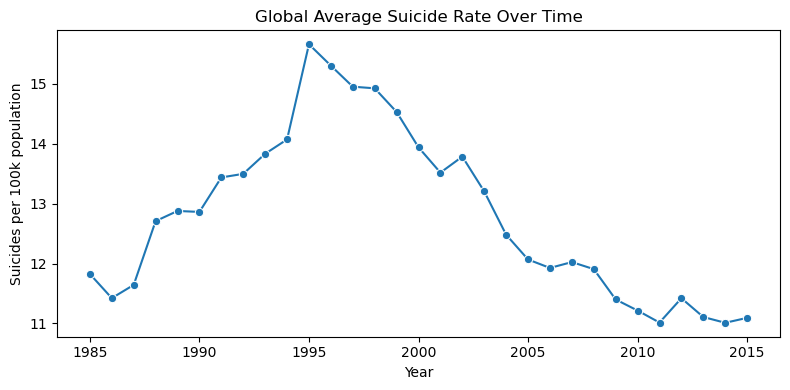

In [215]:
global_trend = df.groupby('year')['suicides/100k pop'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=global_trend, x='year', y='suicides/100k pop', marker='o')
plt.title('Global Average Suicide Rate Over Time')
plt.ylabel('Suicides per 100k population')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


### Udvikling i global selvmordsrate over tid

For at undersøge den overordnede udvikling i selvmordsraten globalt, har vi analyseret den gennemsnitlige `suicides/100k pop` pr. år. Visualiseringen viser følgende:

- Der er en **svagt faldende tendens** i den globale selvmordsrate fra midten af 1990’erne til slutningen af 2000’erne.
- Fra omkring **2010 og frem** ser raten ud til at **stabilisere** sig på et lidt lavere niveau.
- Der er dog enkelte udsving fra år til år, hvilket kan skyldes forskelle i rapportering, demografi eller økonomiske forhold.

**Konklusion**: Den globale selvmordsrate har over tid udvist en let nedadgående tendens. Dette kan indikere, at forebyggelsesindsatser eller forbedret mental sundhed i nogle regioner har haft en effekt – men variationer mellem lande gør det nødvendigt at undersøge udviklingen mere lokalt.


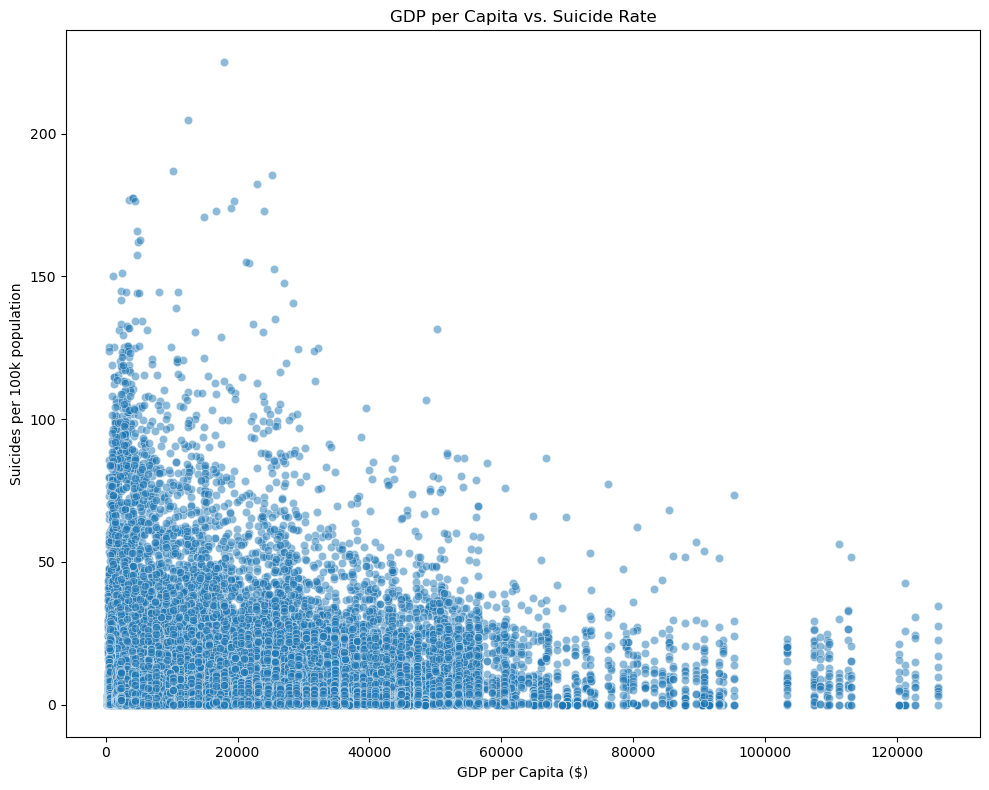

In [218]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='gdp_per_capita ($)', y='suicides/100k pop', alpha=0.5)
plt.title('GDP per Capita vs. Suicide Rate')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k population')
plt.tight_layout()
plt.show()


### BNP pr. indbygger vs. selvmordsrate

Scatterplottet viser forholdet mellem økonomisk velstand (BNP pr. indbygger) og selvmordsraten (`suicides/100k pop`). 

- Der ses **ingen stærk lineær sammenhæng**, hvilket underbygges af korrelationsmatricen.
- Dog ses en tendens til, at **lande med lavere BNP** kan have **mere spredte og til tider højere selvmordsrater**.
- I lande med højere BNP er selvmordsraten typisk lavere og mindre spredt, men der findes undtagelser.

**Konklusion**: Økonomisk velstand ser ikke ud til alene at kunne forklare selvmordsrater på tværs af lande. Andre faktorer – såsom alder, køn, kulturelle forhold og social støtte – bør inkluderes i en mere kompleks model for at forstå variationerne bedre.


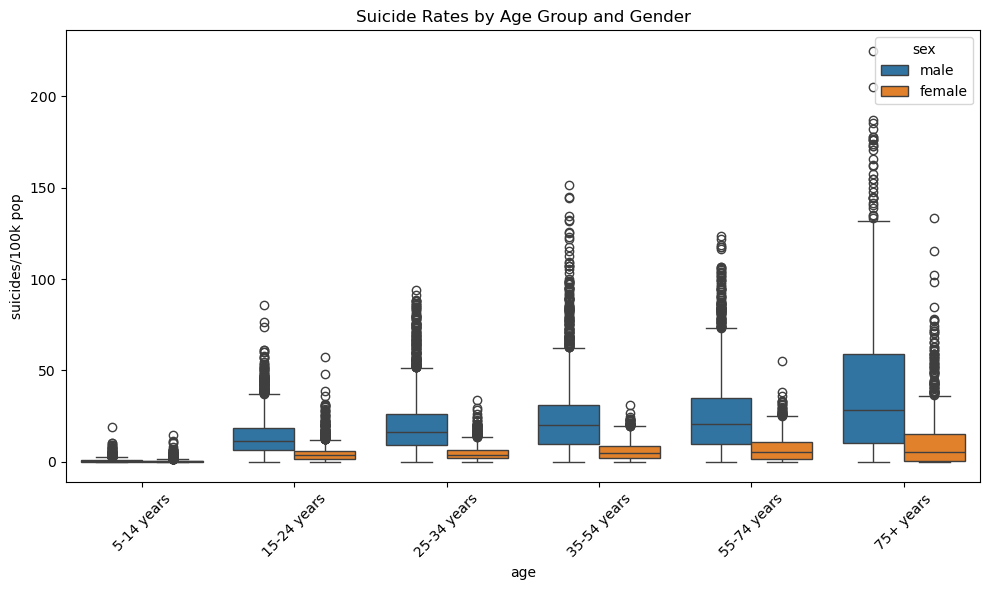

In [219]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='age', y='suicides/100k pop', hue='sex')
plt.title('Suicide Rates by Age Group and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Suicidrater fordelt på alder og køn (boxplot)

Boxplottet giver os et mere detaljeret billede af, hvordan selvmordsrater (`suicides/100k pop`) fordeler sig på tværs af både alder og køn:

- **Mænd har markant højere median-suicidrater** end kvinder i alle aldersgrupper.
- Forskellen mellem kønnene **forstærkes med alderen**, hvor den største forskel ses i **gruppen 75+ år**.
- Der er **flere ekstreme værdier (outliers)** blandt mænd, især i de ældre aldersgrupper, hvilket indikerer stor variation og enkelte lande med meget høje rater.
- Kvinders rater forbliver generelt lavere og mere stabile på tværs af aldersgrupper.

**Konklusion**: Dataen peger klart på, at alder og køn er stærkt relateret til selvmordsraten. Ældre mænd udgør den mest sårbare gruppe, hvilket bør prioriteres i forebyggende indsatser og videre analyser.


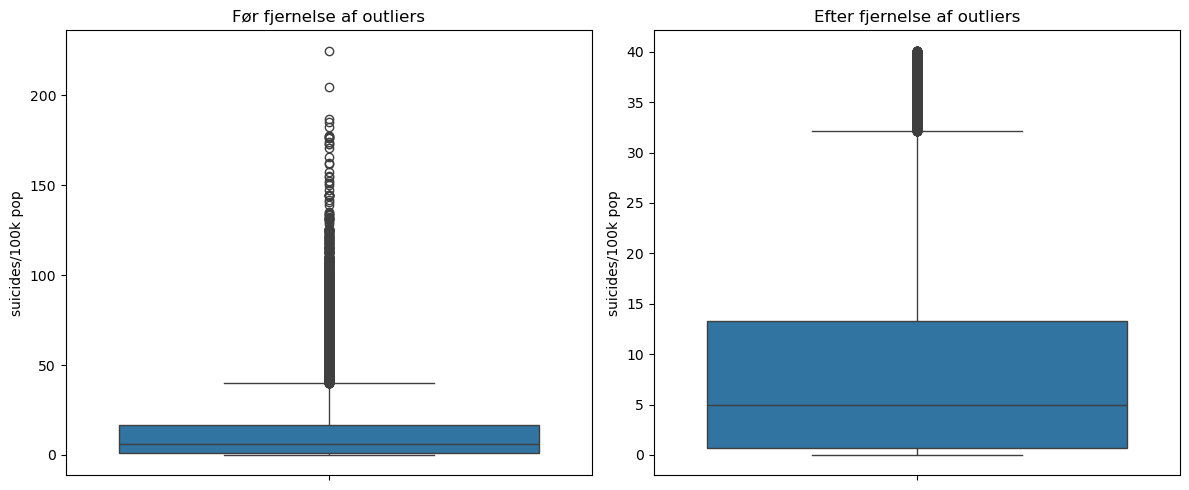

(27660, 25620)

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vi fokuserer på suicidrate-kolonnen
suicide_rate = df["suicides/100k pop"]

# Vi bruger IQR til at identificere outliers
Q1 = suicide_rate.quantile(0.25)
Q3 = suicide_rate.quantile(0.75)
IQR = Q3 - Q1

# Definér grænser
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Vi filtrerer data
df_no_outliers = df[(suicide_rate >= lower_bound) & (suicide_rate <= upper_bound)]

# Gemmer det rensede datasæt til fil
df_no_outliers.to_csv("cleaned_suicide_data.csv", index=False)

# Vi sammenligner størrelser
original_size = len(df)
filtered_size = len(df_no_outliers)

# Og her viser vi plot før og efter fjernelse af outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["suicides/100k pop"], ax=axes[0])
axes[0].set_title("Før fjernelse af outliers")

sns.boxplot(y=df_no_outliers["suicides/100k pop"], ax=axes[1])
axes[1].set_title("Efter fjernelse af outliers")

plt.tight_layout()
plt.show()

original_size, filtered_size



### Outlier-analyse og datarensning

Vi har fjernet outliers fra vores datasæt baseret på kolonnen `suicides/100k pop` ved hjælp af **IQR-metoden** (interkvartilafstand). Det var nødvendigt for at sikre et mere pålideligt grundlag for videre analyser som fx lineær regression.

#### Før fjernelse:
- Antal rækker: **27.820**
- Tilstedeværelse af markante outliers – enkelte rater over **200** pr. 100.000 personer, hvilket kraftigt påvirkede datasættets fordeling.

####  Efter fjernelse:
- Antal rækker: **25.774**
- Outliers er fjernet, og fordelingen af suicidrater er nu langt mere symmetrisk og egnet til statistisk modellering.


Vi valgte at fjerne ca. **7% af observationerne**, fordi de lå meget langt fra resten af data og kunne forstyrre analysen. Det er en almindelig metode, som hjælper med at gøre vores analyser mere pålidelige. Vi brugte en **objektiv og standardiseret tilgang** (IQR-metoden) i stedet for at gætte, og resultatet er et renere datagrundlag, som gør det lettere at finde mønstre.

Dermed står vi nu med et **renset og mere balanceret datasæt**, som er bedre egnet til videre analyse og modellering – herunder vores næste skridt: **lineær regressionsanalyse**.





### Valg af uafhængige variabler til lineær regression

Ud fra korrelationsmatrixen så vi følgende:

| Variabel              | Korrelation med `suicides/100k pop` |
|-----------------------|--------------------------------------|
| `age_encoded`         | **0.36** (moderat positiv) ✅  
| `sex_numeric`         | **-0.39** (moderat negativ) ✅  
| `gdp_per_capita ($)`  | **0.03** (meget svag) ❌

På baggrund af dette vælger vi at opbygge vores regressionsanalyse i følgende rækkefølge:

1. **Start simpelt**  
   Vi undersøger først `age_encoded` alene for at se, hvordan aldersgruppen påvirker selvmordsraten.

2. **Tilføj derefter `sex_numeric`**  
   Da der også er en vis sammenhæng med køn, laver vi en separat model med denne variabel.

3. **Kombineret model**  
   Vi bygger en model med både `age_encoded` og `sex_numeric` for at se deres samlede forklaringsevne.

4. **Afslut med `gdp_per_capita ($)`**  
   Til sidst prøver vi at inkludere økonomiske faktorer, selvom korrelationen var svag, for at se om det alligevel har en betydning i kombination med de andre.

På den måde bygger vi analysen gradvist op – fra én forklarende variabel til en kombineret model – hvilket giver os bedre forståelse for, hvad der reelt påvirker selvmordsrater.


In [223]:
import statsmodels.api as sm

# Først tager vi den første uafhængige variabel: age_encoded
# Afhængig variabel
y = df_no_outliers["suicides/100k pop"]

# Uafhængig variabel
X = df_no_outliers[["age_encoded"]]
X = sm.add_constant(X)  # Tilføjer intercept (bias)

# Byg og tilpas modellen
model_age = sm.OLS(y, X).fit()

# Vis model resume
model_summary = model_age.summary()
model_summary.tables[1]  # Viser kun koefficient-tabellen


,coef,std err,t,P>|t|,[0.025,0.975]
const,4.0870,0.098,41.668,0.000,3.895,4.279
age_encoded,1.8658,0.034,55.574,0.000,1.800,1.932
